In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u # I use astropy units in everything, very helpful for bookkeeping/debugging

from lim import lim # The base intensity mapping object
from datetime import datetime

matplotlib.rcParams.update({'font.size': 18,'figure.figsize':[8,7]}) # Make figures better
#matplotlib.rcParams,update({}'figure.figsize'] = [8,7]
from scipy.ndimage import gaussian_filter
plt.rcParams["mathtext.fontset"] = "dejavuserif"

lc_paths = '/home/dongwooc/scratchspace/pprun_hiz_npz/'
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(lc_paths) if isfile(join(lc_paths, f))]
onlyfiles.remove('pksc2npz_5313591.out')
onlyfiles.remove('pksc2npz.sh')
for i in range(len(onlyfiles)):
    onlyfiles[i] = lc_paths+onlyfiles[i]
    
# Initialize LineModel with default model
m = lim()
m_cii = lim('Lichen_v4', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [2]:
m_cii.update(model_par = {'zdex': 0.4,
 'M0': 1900000000.0,
 'Mmin': 20000000000,
 'alpha_MH1': 0.74,
 'alpha_LCII': 0.024,
 'alpha0': -1.412,
 'gamma0': 0.31,
 'BehrooziFile': 'sfr_reinterp.dat'},
            dnu = 2.8*u.GHz,
            nuObs = 270*u.GHz,
            Delta_nu = 40*u.GHz,
            tobs = np.inf*u.h,
            Omega_field = 4*u.deg**2,
            catalogue_file = '/home/dongwooc/scratchspace/pprun_hiz_npz/COMAP_z5.8-7.9_960Mpc_seed_13819.npz')

In [3]:
pspecs_00 = [0 for i in range(len(onlyfiles))]
pspecs_02 = [0 for i in range(len(onlyfiles))]
pspecs_04 = [0 for i in range(len(onlyfiles))]
pspecs_06 = [0 for i in range(len(onlyfiles))]
pspecs_08 = [0 for i in range(len(onlyfiles))]
pspecs_10 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    pspecs_00[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex00/pspec/cii_pspec'+str(i)+'.npy')
    pspecs_02[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex02/pspec/cii_pspec'+str(i)+'.npy')
    pspecs_04[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/pspec/cii_pspec'+str(i)+'.npy')
    pspecs_06[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex06/pspec/cii_pspec'+str(i)+'.npy')
    pspecs_08[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex08/pspec/cii_pspec'+str(i)+'.npy')
    pspecs_10[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex10/pspec/cii_pspec'+str(i)+'.npy')

In [4]:
pspecs_k = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex00/pspec/cii_ksim.npy')

In [5]:
np.shape(pspecs_00)

(270, 176)

In [6]:
Pk_trend_00 = np.median(pspecs_00, axis = 0)
Pk_00_up = np.percentile(pspecs_00, 84, axis = 0)
Pk_00_down = np.percentile(pspecs_00, 16, axis = 0)

Pk_trend_02 = np.median(pspecs_02, axis = 0)
Pk_02_up = np.percentile(pspecs_02, 84, axis = 0)
Pk_02_down = np.percentile(pspecs_02, 16, axis = 0)

Pk_trend_04 = np.median(pspecs_04, axis = 0)
Pk_04_up = np.percentile(pspecs_04, 84, axis = 0)
Pk_04_down = np.percentile(pspecs_04, 16, axis = 0)

Pk_trend_06 = np.median(pspecs_06, axis = 0)
Pk_06_up = np.percentile(pspecs_06, 84, axis = 0)
Pk_06_down = np.percentile(pspecs_06, 16, axis = 0)

Pk_trend_08 = np.median(pspecs_08, axis = 0)
Pk_08_up = np.percentile(pspecs_08, 84, axis = 0)
Pk_08_down = np.percentile(pspecs_08, 16, axis = 0)

Pk_trend_10 = np.median(pspecs_10, axis = 0)
Pk_10_up = np.percentile(pspecs_10, 84, axis = 0)
Pk_10_down = np.percentile(pspecs_10, 16, axis = 0)

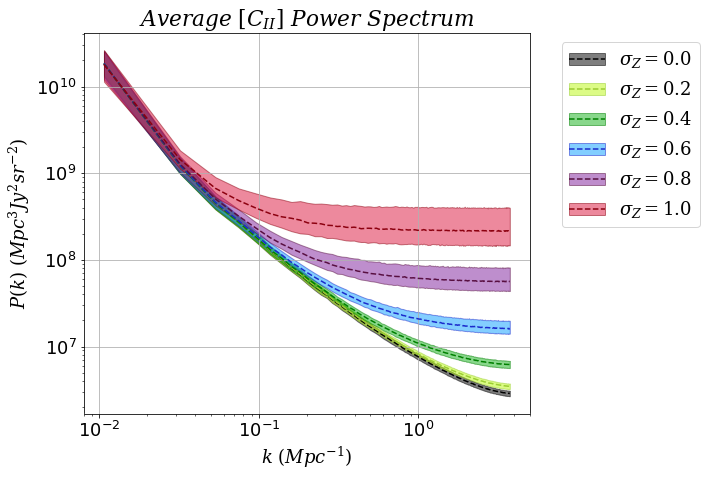

In [22]:
plt.rcParams["mathtext.fontset"] = "dejavuserif"

f, a = plt.subplots()

a.fill_between(pspecs_k, Pk_00_down, Pk_00_up, alpha = 0.5, edgecolor='#000000', facecolor='#010101')
p01 = a.plot(pspecs_k, Pk_trend_00, color = '#000000', linestyle = '--')
p02 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#000000', facecolor='#010101')


a.fill_between(pspecs_k, Pk_02_down, Pk_02_up, alpha=0.5, edgecolor='#9ACD32', facecolor='#BBF90F')
p21 = a.plot(pspecs_k, Pk_trend_02, color = '#9ACD32', linestyle = '--')
p22 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#9ACD32', facecolor='#BBF90F')


a.fill_between(pspecs_k, Pk_04_down, Pk_04_up, alpha=0.5, edgecolor='#008000', facecolor='#15B01A')
p41 = a.plot(pspecs_k, Pk_trend_04, color = '#008000', linestyle = '--')
p42 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#008000', facecolor='#15B01A')


a.fill_between(pspecs_k, Pk_06_down, Pk_06_up, alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
p61 = a.plot(pspecs_k, Pk_trend_06, color = '#1B2ACC', linestyle = '--')
p62 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')


a.fill_between(pspecs_k, Pk_08_down, Pk_08_up, alpha=0.5, edgecolor='#580F41', facecolor='#7E1E9C')
p81 = a.plot(pspecs_k, Pk_trend_08, color = '#580F41', linestyle = '--')
p82 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#580F41', facecolor='#7E1E9C')


a.fill_between(pspecs_k, Pk_10_down, Pk_10_up, alpha=0.5, edgecolor='#8C000F', facecolor='#DC143C')
p101 = a.plot(pspecs_k, Pk_trend_10, color = '#8C000F', linestyle = '--')
p102 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#8C000F', facecolor='#DC143C')

a.legend([(p02[0], p01[0]), (p22[0], p21[0]), (p42[0], p41[0]), (p62[0], p61[0]), (p82[0], p81[0]), (p102[0], p101[0]), ], [(r'$\sigma_Z = 0.0$'), (r'$\sigma_Z = 0.2$'), (r'$\sigma_Z = 0.4$'), (r'$\sigma_Z = 0.6$'), (r'$\sigma_Z = 0.8$'), (r'$\sigma_Z = 1.0$') ], bbox_to_anchor = (1.4,1))




plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xlabel(r'$k\ (Mpc^{-1})$')
plt.ylabel(r'$P(k)\ (Mpc^3 Jy^2 sr^{-2})$')
plt.title(r'$Average\ [C_{II}]\ Power\ Spectrum$')

plt.savefig('paper_figs/fig2_many_pspecs/fig2_pspecs_sigzs_v0.png', bbox_inches = 'tight')

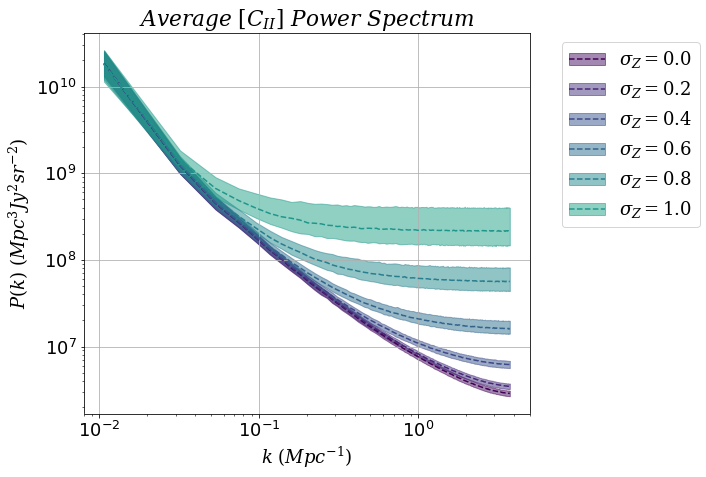

In [20]:
plt.rcParams["mathtext.fontset"] = "dejavuserif"

f, a = plt.subplots()

a.fill_between(pspecs_k[1:], Pk_00_down, Pk_00_up, alpha = 0.5, edgecolor='#440154FF', facecolor='#481567FF')
p01 = a.plot(pspecs_k[1:], Pk_trend_00, color = '#440154FF', linestyle = '--')
p02 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#440154FF', facecolor='#481567FF')


a.fill_between(pspecs_k[1:], Pk_02_down, Pk_02_up, alpha=0.5, edgecolor='#482677FF', facecolor='#453781FF')
p21 = a.plot(pspecs_k[1:], Pk_trend_02, color = '#482677FF', linestyle = '--')
p22 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#482677FF', facecolor='#453781FF')


a.fill_between(pspecs_k[1:], Pk_04_down, Pk_04_up, alpha=0.5, edgecolor='#404788FF', facecolor='#39568CFF')
p41 = a.plot(pspecs_k[1:], Pk_trend_04, color = '#404788FF', linestyle = '--')
p42 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#404788FF', facecolor='#39568CFF')


a.fill_between(pspecs_k[1:], Pk_06_down, Pk_06_up, alpha=0.5, edgecolor='#33638DFF', facecolor='#2D708EFF')
p61 = a.plot(pspecs_k[1:], Pk_trend_06, color = '#33638DFF', linestyle = '--')
p62 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#33638DFF', facecolor='#2D708EFF')


a.fill_between(pspecs_k[1:], Pk_08_down, Pk_08_up, alpha=0.5, edgecolor='#287D8EFF', facecolor='#238A8DFF')
p81 = a.plot(pspecs_k[1:], Pk_trend_08, color = '#287D8EFF', linestyle = '--')
p82 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#287D8EFF', facecolor='#238A8DFF')


a.fill_between(pspecs_k[1:], Pk_10_down, Pk_10_up, alpha=0.5, edgecolor='#1F968BFF', facecolor='#20A387FF')
p101 = a.plot(pspecs_k[1:], Pk_trend_10, color = '#1F968BFF', linestyle = '--')
p102 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#1F968BFF', facecolor='#20A387FF')

a.legend([(p02[0], p01[0]), (p22[0], p21[0]), (p42[0], p41[0]), (p62[0], p61[0]), (p82[0], p81[0]), (p102[0], p101[0]), ], [(r'$\sigma_Z = 0.0$'), (r'$\sigma_Z = 0.2$'), (r'$\sigma_Z = 0.4$'), (r'$\sigma_Z = 0.6$'), (r'$\sigma_Z = 0.8$'), (r'$\sigma_Z = 1.0$') ], bbox_to_anchor = (1.4,1))




plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xlabel(r'$k\ (Mpc^{-1})$')
plt.ylabel(r'$P(k)\ (Mpc^3 Jy^2 sr^{-2})$')
plt.title(r'$Average\ [C_{II}]\ Power\ Spectrum$')

plt.savefig('paper_figs/fig2_many_pspecs/fig2_pspecs_sigzs_v1.png', bbox_inches = 'tight')

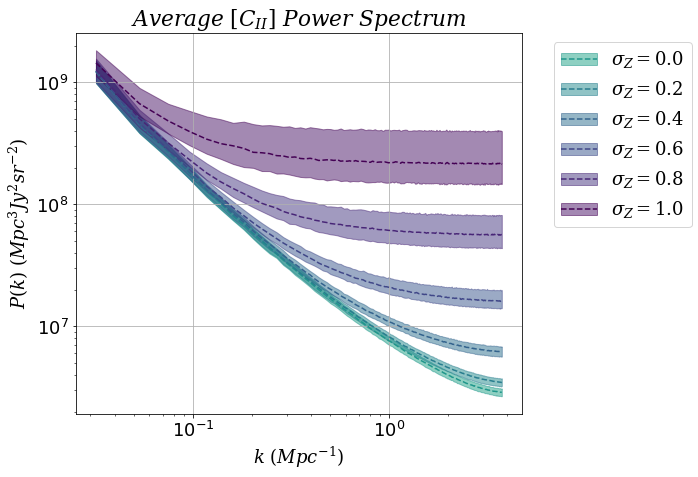

In [23]:
plt.rcParams["mathtext.fontset"] = "dejavuserif"

f, a = plt.subplots()

a.fill_between(pspecs_k[1:], Pk_00_down[1:], Pk_00_up[1:], alpha = 0.5, edgecolor='#1F968BFF', facecolor='#20A387FF')
p01 = a.plot(pspecs_k[1:], Pk_trend_00[1:], color = '#1F968BFF', linestyle = '--')
p02 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#1F968BFF', facecolor='#20A387FF')


a.fill_between(pspecs_k[1:], Pk_02_down[1:], Pk_02_up[1:], alpha=0.5, edgecolor='#287D8EFF', facecolor='#238A8DFF')
p21 = a.plot(pspecs_k[1:], Pk_trend_02[1:], color = '#287D8EFF', linestyle = '--')
p22 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#287D8EFF', facecolor='#238A8DFF')


a.fill_between(pspecs_k[1:], Pk_04_down[1:], Pk_04_up[1:], alpha=0.5, edgecolor='#33638DFF', facecolor='#2D708EFF')
p41 = a.plot(pspecs_k[1:], Pk_trend_04[1:], color = '#33638DFF', linestyle = '--')
p42 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#33638DFF', facecolor='#2D708EFF')


a.fill_between(pspecs_k[1:], Pk_06_down[1:], Pk_06_up[1:], alpha=0.5, edgecolor='#404788FF', facecolor='#39568CFF')
p61 = a.plot(pspecs_k[1:], Pk_trend_06[1:], color = '#404788FF', linestyle = '--')
p62 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#404788FF', facecolor='#39568CFF')


a.fill_between(pspecs_k[1:], Pk_08_down[1:], Pk_08_up[1:], alpha=0.5, edgecolor='#482677FF', facecolor='#453781FF')
p81 = a.plot(pspecs_k[1:], Pk_trend_08[1:], color = '#482677FF', linestyle = '--')
p82 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#482677FF', facecolor='#453781FF')


a.fill_between(pspecs_k[1:], Pk_10_down[1:], Pk_10_up[1:], alpha=0.5, edgecolor='#440154FF', facecolor='#481567FF')
p101 = a.plot(pspecs_k[1:], Pk_trend_10[1:], color = '#440154FF', linestyle = '--')
p102 = a.fill(np.nan, np.nan, alpha=0.5, edgecolor='#440154FF', facecolor='#481567FF')

a.legend([(p02[0], p01[0]), (p22[0], p21[0]), (p42[0], p41[0]), (p62[0], p61[0]), (p82[0], p81[0]), (p102[0], p101[0]), ], [(r'$\sigma_Z = 0.0$'), (r'$\sigma_Z = 0.2$'), (r'$\sigma_Z = 0.4$'), (r'$\sigma_Z = 0.6$'), (r'$\sigma_Z = 0.8$'), (r'$\sigma_Z = 1.0$') ], bbox_to_anchor = (1.4,1))




plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xlabel(r'$k\ (Mpc^{-1})$')
plt.ylabel(r'$P(k)\ (Mpc^3 Jy^2 sr^{-2})$')
plt.title(r'$Average\ [C_{II}]\ Power\ Spectrum$')

plt.savefig('paper_figs/fig2_many_pspecs/fig2_pspecs_sigzs_v2.png', bbox_inches = 'tight')